# Twitter Tweet Object


Tweets are the basic atomic building block of all things Twitter. Tweets are also known as “status updates.” The Tweet object has a long list of ‘root-level’ attributes, including fundamental attributes such as id, created_at, and text. Tweet objects are also the ‘parent’ object to several child objects. Tweet child objects include user, entities, and extended_entities. Tweets that are geo-tagged will have a place child object.
https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object

In [1]:
import psycopg2
import pandas as pd
from config import config
from matplotlib import pylab as plt

%matplotlib inline

In [2]:
conn = None
try:
    # read connection parameters
    params = config()

    # connect to the PostgreSQL server
    print('Connecting to the PostgreSQL database...')
    conn = psycopg2.connect(**params)

    # create a cursor
    cur = conn.cursor()

    # execute a statement
    print('PostgreSQL database version:')
    cur.execute('SELECT version()')

    # display the PostgreSQL database server version
    db_version = cur.fetchone()
    print(db_version)

    # close the communication with the PostgreSQL
    cur.close()

except (Exception, psycopg2.DatabaseError) as error:
    print(error)

Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 10.3 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 7.3.0, 64-bit',)


In [3]:
tweets = pd.read_sql_query("SELECT * FROM tweets_info;", conn, parse_dates=['created_at'] )
print("Number of Tweets: %s" %len(tweets))

Number of Tweets: 286330


In [4]:
tweets.head()

,id,user_id,text,created_at,source,lang,truncated,is_retweet,retweet_id,is_quote,...,quote_count,reply_count,retweet_count,favorite_count,favorited,retweeted,hashtags,user_mentions,number_of_urls,extracted
0,951624637900820481,1658019493,Ihr huensöhne,2018-01-12 01:19:28,"<a href=""http://twitter.com/download/android"" ...",de,False,False,NaN,False,...,0,0,0,0,False,False,None,None,0,False
1,951624793098514433,2394270660,#homo #kostenlos Teenie wird anal zerfetzt (22...,2018-01-12 01:20:05,"<a href=""http://serviporno.com"" rel=""nofollow""...",de,False,False,NaN,False,...,0,0,0,0,False,False,homo kostenlos,None,1,False
2,951624818239180803,3414086001,RT @HoerstelC: #CIA-#Chef #Pompeo dummer #Poli...,2018-01-12 01:20:11,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",de,False,True,9.504821e+17,False,...,0,0,0,0,False,False,CIA Chef Pompeo Politclown FoxNews Iraner Demo...,463758197,0,False
3,951624847616077824,2936727814,"Es gibt einen neuen Deal: (1x, 2x oder 3x Yvel...",2018-01-12 01:20:18,"<a href=""https://Premium-Lizenz.de/"" rel=""nofo...",de,True,False,NaN,False,...,0,0,0,0,False,False,None,None,0,False
4,951623218527395841,3615347356,Die Nationalitätten Feststellung könnte sehr s...,2018-01-12 01:13:50,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",de,True,False,NaN,False,...,0,0,1,2,False,False,None,None,1,True


### Different Kind of Tweets

In [5]:
tweets_temp = tweets[(tweets['is_retweet'] == 0) & 
                       (tweets['is_quote'] == 0) & 
                       (tweets['is_reply'] == 0)]

print("Retweet 0, Quote 0, Reply 0: %0.2f%%\t%s " %(len(tweets_temp)/len(tweets)*100, len(tweets_temp)))
if len(tweets_temp) > 0: print("\tExample: http://twitter.com/statuses/%s" %tweets_temp['id'].iloc[0])

tweets_temp = tweets[(tweets['is_retweet'] == 0) & 
                       (tweets['is_quote'] == 0) & 
                       (tweets['is_reply'] == 1)]

print("\nRetweet 0, Quote 0, Reply 1: %0.2f%%\t%s " %(len(tweets_temp)/len(tweets)*100, len(tweets_temp)))
if len(tweets_temp) > 0: print("\tExample: http://twitter.com/statuses/%s" %tweets_temp['id'].iloc[0])
    
tweets_temp = tweets[(tweets['is_retweet'] == 0) & 
                       (tweets['is_quote'] == 1) & 
                       (tweets['is_reply'] == 0)]

print("\nRetweet 0, Quote 1, Reply 0: %0.2f%%\t%s " %(len(tweets_temp)/len(tweets)*100, len(tweets_temp)))
if len(tweets_temp) > 0: print("\tExample: http://twitter.com/statuses/%s" %tweets_temp['id'].iloc[0])
    
tweets_temp = tweets[(tweets['is_retweet'] == 0) & 
                       (tweets['is_quote'] == 1) & 
                       (tweets['is_reply'] == 1)]

print("\nRetweet 0, Quote 1, Reply 1: %0.2f%%\t%s " %(len(tweets_temp)/len(tweets)*100, len(tweets_temp)))
if len(tweets_temp) > 0: print("\tExample: http://twitter.com/statuses/%s" %tweets_temp['id'].iloc[0])
    
tweets_temp = tweets[(tweets['is_retweet'] == 1) & 
                       (tweets['is_quote'] == 0) & 
                       (tweets['is_reply'] == 0)]

print("\n\nRetweet 1, Quote 0, Reply 0: %0.2f%%\t%s " %(len(tweets_temp)/len(tweets)*100, len(tweets_temp)))
if len(tweets_temp) > 0: print("\tExample: http://twitter.com/statuses/%s" %tweets_temp['id'].iloc[0])
    
tweets_temp = tweets[(tweets['is_retweet'] == 1) & 
                       (tweets['is_quote'] == 0) & 
                       (tweets['is_reply'] == 1)]

print("\nRetweet 1, Quote 0, Reply 1: %0.2f%%\t%s " %(len(tweets_temp)/len(tweets)*100, len(tweets_temp)))
if len(tweets_temp) > 0: print("\tExample: http://twitter.com/statuses/%s" %tweets_temp['id'].iloc[0])
    
tweets_temp = tweets[(tweets['is_retweet'] == 1) & 
                       (tweets['is_quote'] == 1) & 
                       (tweets['is_reply'] == 0)]

print("\nRetweet 1, Quote 1, Reply 0: %0.2f%%\t%s " %(len(tweets_temp)/len(tweets)*100, len(tweets_temp)))
if len(tweets_temp) > 0: print("\tExample: http://twitter.com/statuses/%s" %tweets_temp['id'].iloc[0])
    
tweets_temp = tweets[(tweets['is_retweet'] == 1) & 
                       (tweets['is_quote'] == 1) & 
                       (tweets['is_reply'] == 1)]

print("\nRetweet 1, Quote 1, Reply 1: %0.2f%%\t%s " %(len(tweets_temp)/len(tweets)*100, len(tweets_temp)))
if len(tweets_temp) > 0: print("\tExample: http://twitter.com/statuses/%s" %tweets_temp['id'].iloc[0])

Retweet 0, Quote 0, Reply 0: 47.28%	135389 
	Example: http://twitter.com/statuses/951624637900820481

Retweet 0, Quote 0, Reply 1: 22.94%	65696 
	Example: http://twitter.com/statuses/951625548039643137

Retweet 0, Quote 1, Reply 0: 4.05%	11592 
	Example: http://twitter.com/statuses/951624621106675712

Retweet 0, Quote 1, Reply 1: 0.13%	376 
	Example: http://twitter.com/statuses/951721274639699968


Retweet 1, Quote 0, Reply 0: 23.68%	67804 
	Example: http://twitter.com/statuses/951624818239180803

Retweet 1, Quote 0, Reply 1: 0.00%	0 

Retweet 1, Quote 1, Reply 0: 1.91%	5473 
	Example: http://twitter.com/statuses/951632451884986368

Retweet 1, Quote 1, Reply 1: 0.00%	0 


### 'created_at' Statistics

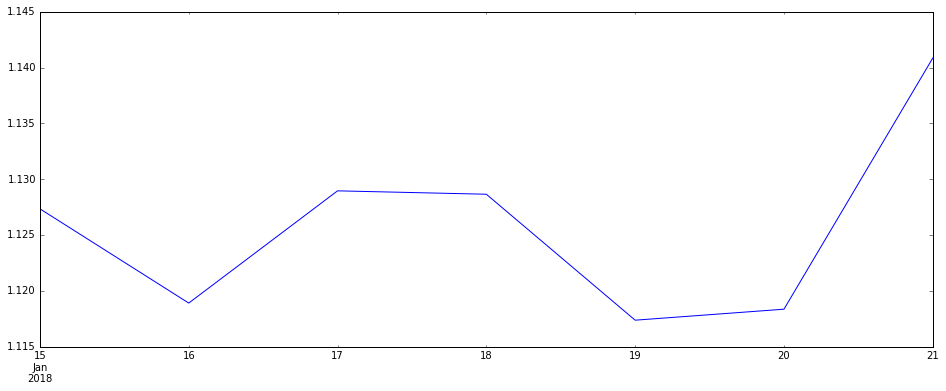

In [6]:
dates_values = tweets['created_at'][(tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.week == 3)].value_counts()
#dates_values = tweets['created_at'][(tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.week == 7 )].value_counts()

dates_values.resample('D').mean().plot(figsize=(16,6))
#plt.plot(dates_values.index,dates_values)
#plt.gcf().autofmt_xdate()
#plt.show()

### Hashtags

In [7]:
#hashtags = pd.DataFrame(columns=['created_at', 'hashtag', 'id'])
entry_list = []

for index, row in tweets.iterrows():
    if row['hashtags'] != None:
        hashtag_list = row['hashtags'].split(" ")
        for hashtag in hashtag_list:
            entry_list.append({'created_at': row['created_at'], 'hashtag': hashtag,  'id': row['id']})
entry_list
hashtags = pd.DataFrame(data=entry_list, columns=['created_at', 'hashtag', 'id'])
hashtags.set_index('created_at')
hashtags.head()

,created_at,hashtag,id
0,2018-01-12 01:20:05,homo,951624793098514433
1,2018-01-12 01:20:05,kostenlos,951624793098514433
2,2018-01-12 01:20:11,CIA,951624818239180803
3,2018-01-12 01:20:11,Chef,951624818239180803
4,2018-01-12 01:20:11,Pompeo,951624818239180803


In [8]:
hashtags.index

RangeIndex(start=0, stop=190250, step=1)

In [9]:
hashtag_selection = hashtags['hashtag'][hashtags['created_at'].dt.week == 3].value_counts()[0:20]
print(hashtag_selection)

iHeartAwards      2174
spdbpt18          1055
SPD               1036
AfD                831
BestFanArmy        781
GroKo              757
Friederike         704
BestBoyBand        640
ibes               638
NoGroKo            441
BTS                403
Merkel             381
Berlin             369
BTSARMY            359
IBES               355
Afrin              340
BestMusicVideo     332
SwishSwish         250
Schulz             245
CNCO               241
Name: hashtag, dtype: int64


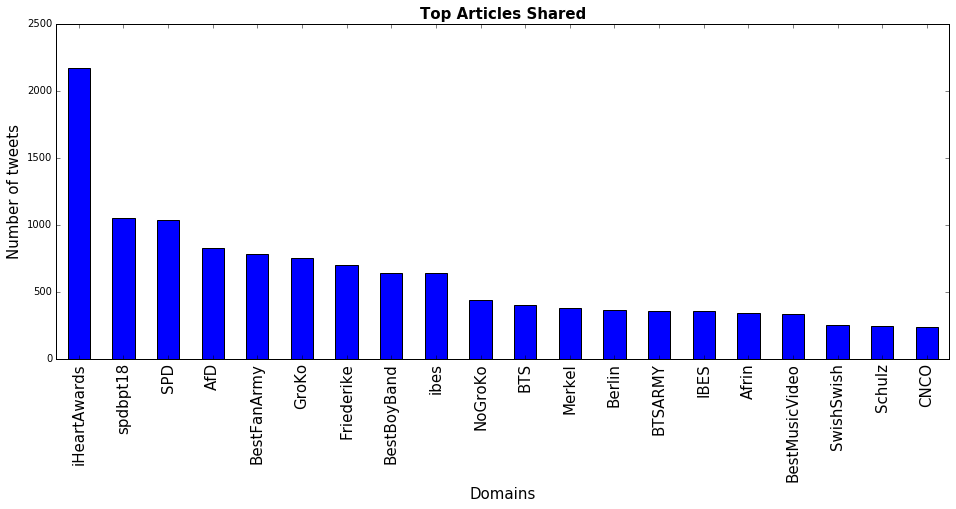

In [10]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Domains', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top Articles Shared', fontsize=15, fontweight='bold')
hashtag_selection.plot(ax=ax, kind='bar', color='blue', figsize=(16,6))

### User Mentions

In [11]:
query = ''' SELECT tweets_info.created_at, user_mentions, tweets_info.id, tweets_info.user_id, tweets_users.name
            FROM tweets_info INNER JOIN tweets_users 
            ON (tweets_info.user_id = tweets_users.id); '''
tweets_by_user_mentions = pd.read_sql_query(query, conn, parse_dates=['created_at'])

tweets_by_user_mentions.head()

,created_at,user_mentions,id,user_id,name
0,2018-01-12 01:20:11,463758197,951624818239180803,3414086001,Elke
1,2018-01-12 01:21:13,11522502,951625078290206725,2866854441,Vintage4Moms
2,2018-01-12 01:22:27,None,951625388689588224,890433283233918977,Лиля Игошина
3,2018-01-12 01:23:03,None,951625539680460800,890318999879380994,Margaret H
4,2018-01-12 01:23:05,1401731365,951625548039643137,951425905855000576,Phönix


In [12]:
#hashtags = pd.DataFrame(columns=['created_at', 'hashtag', 'id'])
entry_list = []

for index, row in tweets_by_user_mentions.iterrows():
    if row['user_mentions'] != None:
        mention_list = row['user_mentions'].split(" ")
        for mention in mention_list:
            entry_list.append({'created_at': row['created_at'], 'user_mention': mention,  'id': row['id']})

user_mentions = pd.DataFrame(data=entry_list, columns=['created_at', 'user_mention', 'id'])
user_mentions.set_index('created_at')
user_mentions.head()

,created_at,user_mention,id
0,2018-01-12 01:20:11,463758197,951624818239180803
1,2018-01-12 01:21:13,11522502,951625078290206725
2,2018-01-12 01:23:05,1401731365,951625548039643137
3,2018-01-12 08:32:02,811820732,951733496845950977
4,2018-01-12 01:19:41,934877019132911617,951624692405821441


In [13]:
user_m = user_mentions['user_mention'][user_mentions['created_at'].dt.week == 3].value_counts()[0:20]
print(user_m)

10228272              1833
335141638              847
8720562                481
26458162               455
5734902                402
17675072               367
873115441303924736     308
46623193               237
844081278              225
838018569732501508     207
833398209053605888     203
2834511                196
910913583168573440     195
18047862               187
9204502                183
773069256              173
860808843667935232     166
425845268              165
805308596              164
5494392                158
Name: user_mention, dtype: int64


### Tweets by User

In [14]:
tweets['user_id'].value_counts()[:10]

111912038             427
838018569732501508    319
122207287             259
14871035              239
5734902               197
8720562               197
168355110             195
99940746              190
335411309             147
169251474             144
Name: user_id, dtype: int64

In [15]:
query = ''' SELECT tweets_info.created_at, tweets_info.id, tweets_info.user_id, tweets_users.name
            FROM tweets_info INNER JOIN tweets_users 
            ON (tweets_info.user_id = tweets_users.id); '''
tweets_by_user = pd.read_sql_query(query, conn, parse_dates=['created_at'])

tweets_by_user.head()

,created_at,id,user_id,name
0,2018-01-12 01:20:11,951624818239180803,3414086001,Elke
1,2018-01-12 01:21:13,951625078290206725,2866854441,Vintage4Moms
2,2018-01-12 01:22:27,951625388689588224,890433283233918977,Лиля Игошина
3,2018-01-12 01:23:03,951625539680460800,890318999879380994,Margaret H
4,2018-01-12 01:23:05,951625548039643137,951425905855000576,Phönix


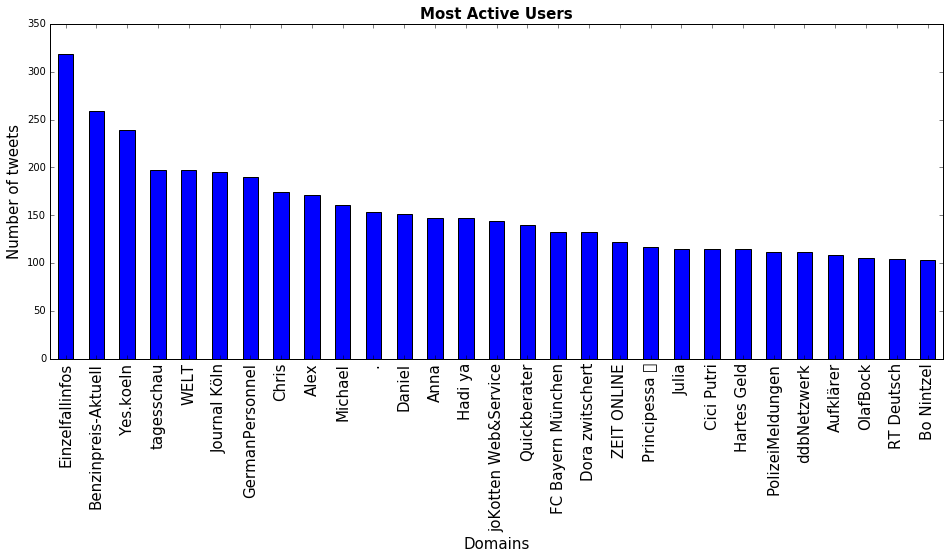

In [16]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Domains', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Most Active Users', fontsize=15, fontweight='bold')
by_user_values = tweets_by_user['name'].value_counts()[1:30].plot(ax=ax, kind='bar', color='blue', figsize=(16,6))

### Retweets

In [17]:
query = ''' SELECT t2.id, t2.created_at, t2.is_retweet
            FROM tweets_info t1 INNER JOIN tweets_info t2
            ON (t1.retweet_id = t2.id); '''
retweets = pd.read_sql_query(query, conn)

retweets.head()

,id,created_at,is_retweet
0,950482061613260803,Mon Jan 08 21:39:17 +0000 2018,False
1,951625689173774336,Fri Jan 12 01:23:39 +0000 2018,False
2,949005976832806913,Thu Jan 04 19:53:51 +0000 2018,False
3,950209967465910272,Mon Jan 08 03:38:04 +0000 2018,False
4,950103894583062529,Sun Jan 07 20:36:35 +0000 2018,False


In [18]:
retweets['id'].value_counts()

987935758630535168    108
987747195687522310     97
952512749329727489     75
953012448847593475     67
954363200656388096     59
953248686213140481     55
986617550690832384     51
949005976832806913     48
986624104286556160     47
951639828252196865     41
952180624080719872     40
985993291295547397     38
954003320426942469     35
987299951003648000     35
953680882409320449     34
985625789461925889     34
951822731569373185     33
953196308285796352     32
952192485337522176     32
987407702728077312     31
988024824336343040     30
932626174446067714     30
952747478830501891     30
954154441384501248     30
952259620185231360     29
987253870165454848     29
986122100384632832     28
954398730916126720     28
941670313997221888     27
987251777794920448     27
                     ... 
955122718525087745      1
952255199703388162      1
953662532010602502      1
953275486259511298      1
953610269657313281      1
954366753030668288      1
986578089852522499      1
986279038418

### Lang

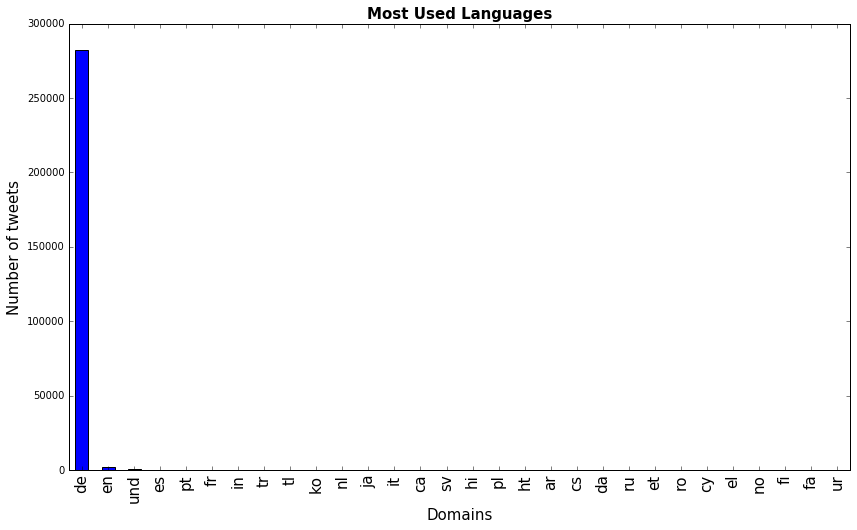

In [26]:
tweets_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Domains', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Most Used Languages', fontsize=15, fontweight='bold')
tweets_lang[0:30].plot( kind='bar', color='blue', figsize=(14,8))

### Same Text Original Tweets

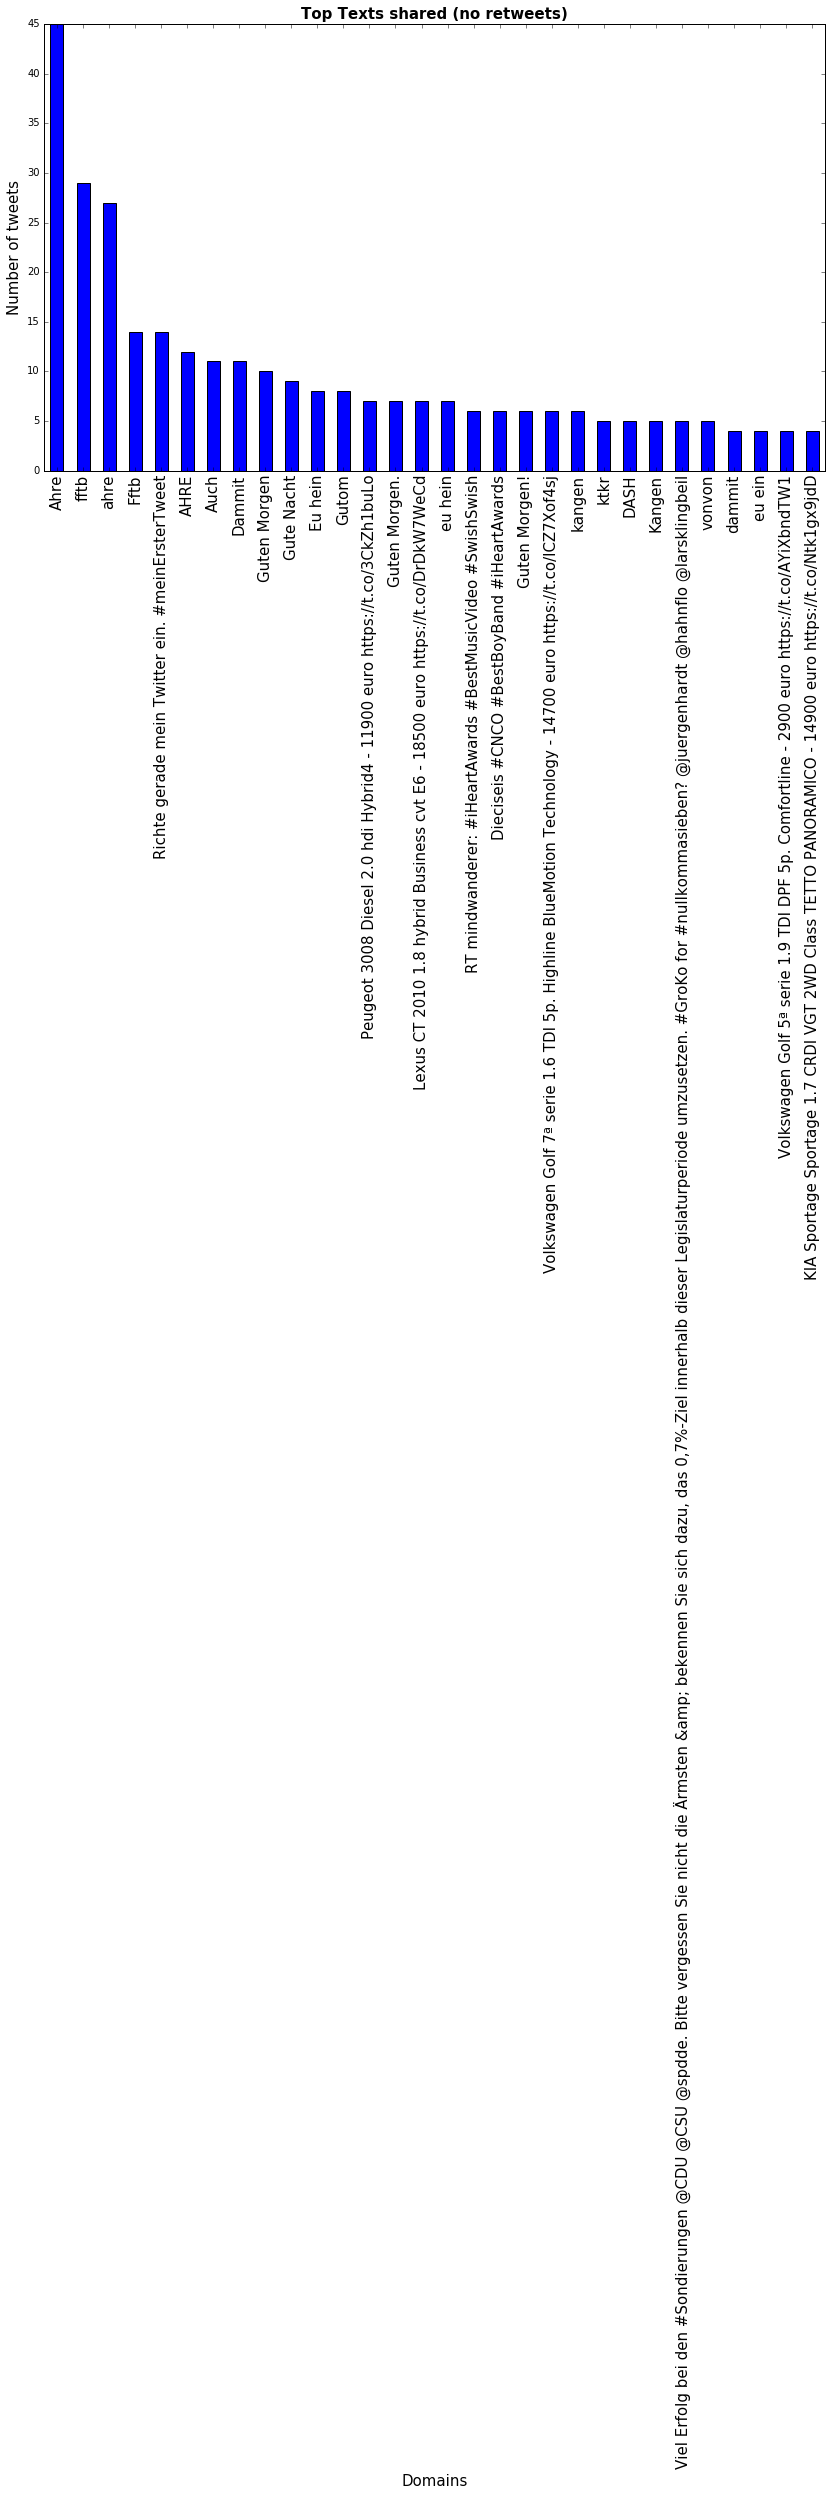

In [27]:
tweets_origonal= tweets['text'][(tweets['is_retweet'] == False) & (tweets['is_reply'] == False) & (tweets['is_quote'] == False)].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Domains', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top Texts shared (no retweets)', fontsize=15, fontweight='bold')
tweets_origonal[:30].plot( kind='bar', color='blue', figsize=(14,8))

In [4]:
tweets_origonal= tweets['top_level_domain'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Domains', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top Texts shared (no retweets)', fontsize=15, fontweight='bold')
tweets_origonal[:30].plot( kind='bar', color='blue', figsize=(14,8))

KeyError: 'top_level_domain'